In [1]:
from linkage_utils import *

# Description of Helper Functions:

Aside from the Jupyter notebooks you will also find a file called <code>linkage_utils.py</code>. This file includes some useful tools and functions which can make things easier for you and speed up your project development. Below is a list of functions provided and how they can be used:

<ul>
    <li>
        <code>chamfer_distance(x, y)</code>: Given two sets of point clouds x and y this function returns a subsampled (approximate not exact to reduce computational cost) bi-directional chamfer distance. To get exact chamfer distance use <code>chamfer_distance(x, y,subsample=False)</code>.
    </li>
    <li>
        <code>rasterized_curve_coords(curve, res)</code>: Rasterizes given curve into a grid of specified resolution (res x res grid). This function returns a point cloud (coordinates of the rasterized curve).
    </li>
    <li>
        <code>draw_mechanism(C,x0,fixed_nodes,motor)</code>: This function plots a mechanisms and it's traced paths given the mechanisms components as described before.
    </li>
    <li>
        <code>draw_mechanism_on_ax(C,x0,fixed_nodes,motor,ax)</code>: This function plots a mechanisms and it's traced paths given the mechanisms components as described before. The difference between this and the previous is that the mechanism will be drawn on a Matplotlib axes object (which is passed as ax to the function), this gives you control over the plot itself if needed.
    </li>
    <li>
        <code>mechanism_solver()</code>: A class, which initiates an instance of a solver for the mechanism. This class has several useful functions within it:<br><br><br>
        <ul>
            <li>
                <code>solve_rev(n_steps, x0, C, motor, fixed_nodes, show_msg)</code>: This function of the solver solves the mechanisms for a full revolution of the motor. The resolution of the solution is determined by the number of points use to discretize the solution (n_steps is the number of points between 0 and 2$\pi$ that will be set at the motor linkage to solve the system).
            </li>
            <li>
                <code>material(x0, C)</code>: This function of the solver calculates the material use (the total length of linkages) in a given mechanism. 
            </li>
        </ul>
        <br>
        This solver is based on:<br><b>Bacher, M., Coros, S., Thomaszewski, B. (2015). LinkEdit: interactive linkage editing using symbolic kinematics. ACM Transactions on Graphics (TOG), 34(4), 99.</b><br><br>
    </li>
    <li>
        <code>random_generator_ns(g_prob = 0.15, n=None, N_min=8, N_max=20, strategy='rand')</code>: This function returns random mechanisms which are valid (not under or over defined and not locking). All parameters are optional and not necessary. The most important is n which if set will give random mechanisms of size n. For further information refer to the functions docstring (look at the <code>linkage_utils.py</code> file).Use <code>batch_random_generator(N,g_prob = 0.15, n=None, N_min=8, N_max=20, strategy='rand')</code> to generate N random mechanims fast(much faster).
    </li>
    <li>
        <code>curve_normalizer(scale)</code>: Initializes an instance of the normalizer. The scale parameter refers to whether the normalization is scale invariant. If True it will normalize the scales of the mechanisms as well. In this project always set this to False as the curves are not scale invariant. This class has several useful functions within it:<br><br>
        <ul>
            <li>
                <code>get_oriented(curve)</code>: This function will return the normalized version of the input curve.
            </li>
            <li>
                <code>__call__(curves)</code>: This function performs the same on a batch of curves instead of one curve. The input to this is a list of curves.
            </li>
        </ul>
        <br>
    </li>
    <li>
        <code>PolyArea(x,y)</code>: Area of a polygon given the coordinates of the polygon points (x is a list of x coordinates and y is a list of y coordinates).
    </li>
    <li>
        <code>to_final_representation(C,x0,fixed_nodes,motor,target)</code>: As seen before.
    </li>
    <li>
        <code>from_1D_representation(mechanism)</code>: As seen before.
    </li>
    <li>
        <code>save_population_csv(file_name, population)</code>: As seen before.
    </li>
    <li>
        <code>get_population_csv(file_name)</code>: As seen before.
    </li>
</ul>

Now we will try these functions and see how they can be applied. Let's start with the last random curve that we have:

**Generate a random mechanism**

In [9]:
C,x0,fixed_nodes,motor = random_generator_ns()

**Simulate mechanism**

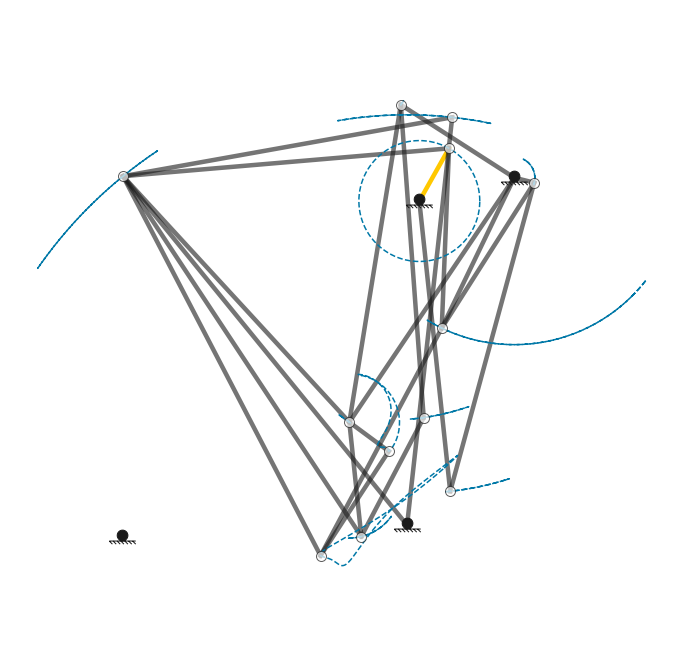

In [10]:
draw_mechanism(C,x0,fixed_nodes,motor)

**Create and run a solver instance**

In [11]:
# First start a solver instance
solver = mechanism_solver()

# Now let's get the solution for 200 point descretization
x_sol,locking,over_under_defined = solver.solve_rev(200,x0,C,motor,fixed_nodes,False)

# Note that locking and over_under_defined outputs if true mean that the mechanims is locking or under/over defined respectively.


Material Used: 17.542211


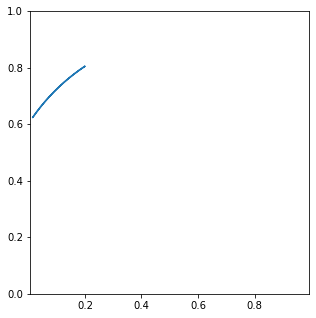

In [12]:
# Lets pick a random target node
target = 3

# Lets see what the output of this node is
plt.figure(figsize=(5,5.2))
plt.plot(x_sol[:,target,0],x_sol[:,target,1])
plt.axis('equal')
plt.xlim([0,1])
plt.ylim([0,1])

# Now lets compute material use:
material = solver.material(x0,C)

print('Material Used: %f' % (material))

**Apply the Curve Normalizer**

(0.0, 1.0)

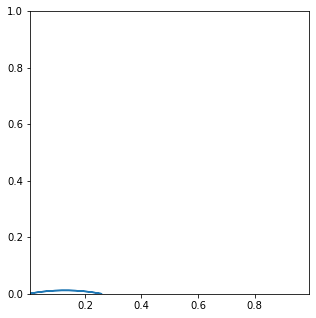

In [13]:
# Make a normalizer instance
normalizer = curve_normalizer(scale=False)

# Normalize the target curve
x_norm = normalizer.get_oriented(x_sol[:,target,:])

# Lets see what the normalized output of the 4th node is
plt.figure(figsize=(5,5.2))
plt.plot(x_norm[:,0],x_norm[:,1])
plt.axis('equal')
plt.ylim([0,1])
plt.xlim([0,1])

**Rasterize Curve**

[[ 53   5]
 [  4   0]
 [124   1]
 [125   0]
 [ 61   6]
 [ 27   4]
 [ 93   4]
 [107   3]
 [  5   1]
 [129   0]
 [ 65   6]
 [112   2]
 [ 29   4]
 [ 81   5]
 [ 95   4]
 [  7   1]
 [ 67   6]
 [ 83   5]
 [  9   1]
 [ 43   5]
 [ 56   5]
 [ 45   5]
 [ 22   3]
 [ 30   4]
 [  0   0]
 [ 68   6]
 [ 57   6]
 [ 24   3]
 [103   3]
 [115   2]
 [ 72   6]
 [ 73   5]
 [ 70   6]
 [ 77   5]
 [102   4]
 [ 36   4]
 [ 11   2]
 [ 75   5]
 [ 15   2]
 [ 90   5]
 [ 79   5]
 [ 39   5]
 [ 63   6]
 [109   3]
 [ 17   2]
 [ 92   5]
 [  5   0]
 [126   0]
 [ 52   5]
 [ 41   5]
 [123   1]
 [  6   1]
 [106   3]
 [128   0]
 [ 64   6]
 [ 54   5]
 [110   3]
 [ 20   3]
 [ 28   4]
 [ 80   5]
 [ 94   4]
 [ 66   6]
 [ 32   4]
 [ 98   4]
 [ 10   1]
 [113   2]
 [ 18   2]
 [ 82   5]
 [117   2]
 [ 34   4]
 [ 86   5]
 [100   4]
 [ 59   6]
 [105   3]
 [ 44   5]
 [ 13   2]
 [ 88   5]
 [  1   0]
 [ 48   5]
 [119   1]
 [ 23   3]
 [  3   0]
 [124   0]
 [ 60   6]
 [ 50   5]
 [118   2]
 [121   1]
 [ 35   4]
 [ 76   5]
 [101   4]
 [ 25   3]

(-6.45, 135.45, -0.30000000000000004, 6.3)

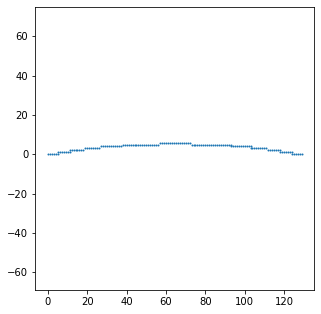

In [15]:
# Rasterize to 500x500 grid
out_pc = rasterized_curve_coords(x_norm,500)
print(out_pc)
# Lets see what the output of the 4th node is
plt.figure(figsize=(5,5.2))
plt.scatter(out_pc[:,0],out_pc[:,1],s=1)
plt.axis('equal')

**Compute Chamfer Distance to Curve 13**

Chamfer Distance: 24.554984


(-8.5, 178.5, -1.25, 26.25)

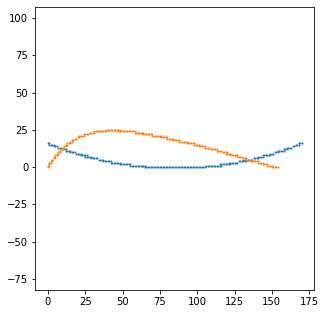

In [8]:
# Compute Chamfer Distance
target_curves = []

# Read every file separately and append to the list
for i in range(20):
    target_curves.append(np.loadtxt('./data/%i.csv'%(i),delimiter=','))

cd = chamfer_distance(out_pc,target_curves[13],subsample=False)
print("Chamfer Distance: %f"%(cd))

# Lets plot the overlay
plt.figure(figsize=(5,5.2))
plt.scatter(out_pc[:,0],out_pc[:,1],s=1)
plt.scatter(target_curves[13][:,0],target_curves[13][:,1],s=1)
plt.axis('equal')

# Extra Information about Mechanism Representation For Submissions

we have made all the functions and examples provided to you based around the representation of the mechanism discussed prior. However, to allow for students to work on different platforms and programming languages we have come up with a different representation which you will use to submit your results. Don't worry: we have also included functions within python to convert the previous representation into this representation.

For the submission we use the same basic 4 components to define the representation of the mechanism, however we flatten all matrices and arrays into a single dimensional array. Further, we also require you to specify the target node (The node which has the desirable trace) The format of this representation is as follows:

<ol>
    <li><b>Number of Nodes:</b> The number of nodes in the mechanism will go at the start of the array. See figure below.</li>
    <li><b>Adjacency/Connectivity Matrix: </b> Each row of the matrix will placed after the previous in the same order. See figure below.</li>
    <li><b>Node Types: </b>Instead of a list of the fixed nodes we will have N elements after the adjacency array which reflect the type of each node (1 if ground and 0 if ordinary node). See figure below.</li>
    <li><b>Initial Positions: </b> Similar to adjacency matrix, this time the two positions of each node will be placed right after the previous node. See figure below.</li>
    <li><b>Motor: </b>Similar what we had before just appended to the rest of the representation. See figure below.</li>
    <li><b>Target: </b>The number of the node to be assessed as a single number from 0 to N-1 append to the end of the representation array. See figure below.</li>
</ol>|

<img src="https://i.ibb.co/ZVbGK19/untitled-1.png" alt="representation" border="0">

#### Example:
Take the previous mechanism (Note that target it the last node or node number 4):

<img src="https://i.ibb.co/qsPC0gC/2021-09-13-0hl-Kleki.png" alt="Numbered Mechanism" border="0">

For this mechanism we have defined the the Connectivity Matrix (<code>C</code>), initial positions matrix (<code>x0</code>), motor linkage (<code>motor</code>), and a list of fixed nodes(<code>fixed_nodes</code>) in the main notebook. We copy this here. 


In [9]:
# Manually define the connectivity matrix
C = np.array([[0,0,1,0,0],
              [0,0,0,1,0],
              [1,0,0,1,1],
              [0,1,1,0,1],
              [0,0,1,1,0]])

# List of fixed nodes
fixed_nodes = np.array([0,1])

# Initial positions
x0 = np.array([[0.4,0.5],
               [0.6,0.5],
               [0.4,0.6],
               [0.6,0.7],
               [0.5,0.75]])

# Motor 
motor = np.array([2,0])



We need to define the mechanism length (<code>N</code>), convert the list of fixed nodes to our our node type array (<code>node_types</code>) and define the target node (<code>target_node</code>). Finally, we flatten all of these components and concatenate them:

In [10]:
# Get the size of the mechanism in this case 5
N = C.shape[0]

# Make the list of node types (set all to zero or ordinary)
node_types = np.zeros([N])

# Set the ground nodes
node_types[fixed_nodes] = 1

# Set the target
target_node = 4

# Concatenate to make the final representation
final_representation = np.concatenate([[N],C.reshape(-1),x0.reshape(-1),node_types,motor,[target_node]])

To make things easier we have provided the <code>to_final_representation(C,x0,fixed_nodes,motor,target)</code> function to you in the <code>linkage_utils module</code>. We also have provided the <code>from_1D_representation(mechanism)</code> function which returns <code>C,x0,fixed_nodes,motor,target</code> from the 1D representation, essentially reversing the process. Let's check that converting back and forth maintains the correct mechanism|

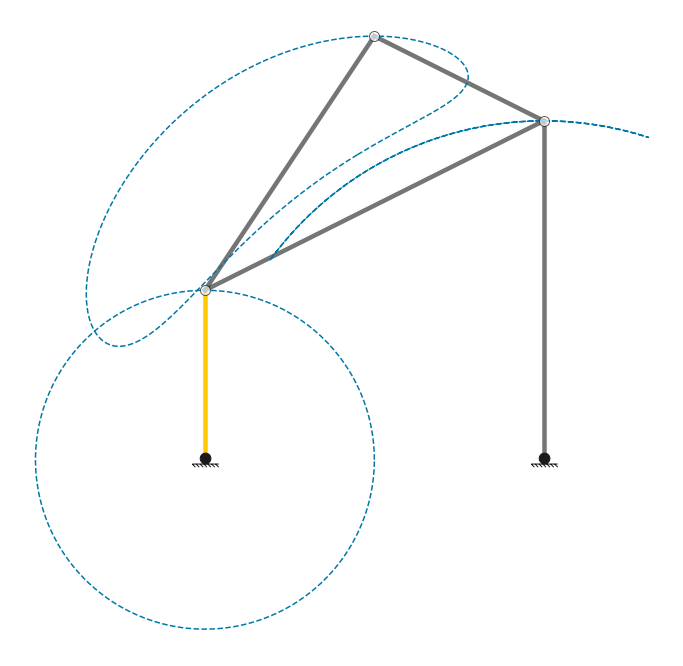

In [11]:
# Get 1D representation
final_representation = to_final_representation(C,x0,fixed_nodes,motor,target_node)

# Reverse The process
C,x0,fixed_nodes,motor,target = from_1D_representation(final_representation)

# Darw to ensure everything went as expected
draw_mechanism(C,x0,fixed_nodes,motor)

# Extra information on Rasterization, Normalization, and Chamfer Distance

The target curves are provided to you in a specific format. The curves are actually point clouds on a 500x500 grid. These curves are obtained from randomly generated mechanisms so they are all valid curves that 1 DOF planar mechanisms are capable of producing. The curves that are given to you were processed as follows:

<ol>
    <li><b>Normalize: </b> The output of a node in the mechanisms is normalized using the normalizer instance we have provided to orient the output curve such that it has it's maximum length along the x-axis. This will make the output orientation-invariant and the target provided will also have such normalized orientation. This way we don't worry about the orientation of the output curve rather the shape of it.</li>
    <li><b>Rasterize: </b> Finally the curve was rasterized to a point cloud with points standardized to a 500x500 grid of points. This way the timing of the output curve is removed and only the shape is kept, while the coordinates of the point cloud are also matched to the 500x500 grid. Look at Bresenham's line algorithm to get further details on this process or look at our <code>rasterized_curve_coords(curve,resolution)</code></li> in the <code>linkage_utils.py</code> file.
</ol>

You are tasked with generating mechanisms that are capable of producing curves that mimic the target curves as well as possible. We measure the closeness of two point clouds by computing the bi-directional chamfer distance between the two point clouds. Chamfer distance is calculated by:

$$
d_{C D}\left(S_{1}, S_{2}\right)=\sum_{x \in S_{1}} \min _{y \in S_{2}}\|x-y\|_{2}^{2}+\sum_{y \in S_{2}} \min _{x \in S_{1}}\|x-y\|_{2}^{2}
$$

See our <code>chamfer_distance(curve1,curve2)</code> implementation in <code>linkage_utils.py</code> for implementation details in python.

<img src="https://i.ibb.co/WznB1R8/compare.png" alt="compare" border="0">

The other part of the objective in this challenge problem is reducing the material used by the mechanism. This is the total length of all linkages. We have provided a function that makes this measurement for you using initial positions and adjacency matrix for a mechanism (The functions and useful tools are going to be described later).

[IMPORTANT] In this project three constraints are set for you:
<ul>
    <li><b>Chamfer Distance: </b>Any mechanisms output with a chamfer distance to the target curve larger than 30 (based on the 500x500 rasterized coordinates) will be considered invalid and will not be used to calculate the score of the submissions.</li>
    <li><b>Material Use: </b>Any mechanism with total linkage lengths more than 6.0 will be deemed invalid and will not be used to calculate the score of the submissions.</li>
    <li><b>Mechanism Complexity: </b>For this project we want you to generate mechanisms with no more than 20 nodes (i.e., <code>N<=20</code>).</li>
</ul>

Submitted mechanisms that violate these constraints will not be scored. 